In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import dash
from dash import html
from dash import dcc

In [67]:
df_covid = pd.read_csv('Data/covid-data.csv', delimiter=',')
df_eco_covid = pd.read_csv('Data/data_econo_covid.csv', delimiter=';')
df_education = pd.read_csv('Data/Education-GDP.csv', delimiter=',')
df_GDP = pd.read_csv('Data/GDP.csv', delimiter=',')
df_gini = pd.read_csv('Data/gini.csv', delimiter=',')
df_poverty = pd.read_csv('Data/poverty-explorer.csv', delimiter=',')
df_trade = pd.read_csv('Data/trade.csv', delimiter=',')
df_HICP_FR = pd.read_csv('Data/HICP_FR.csv', delimiter=',') #The Harmonized Consumer Price Index (HICP) provides a standardized measure of inflation across EU countries. 
df_HICP_BE = pd.read_csv('Data/HICP_BE.csv', delimiter=',')
df_HICP_BU_21 = pd.read_csv('Data/HICP_BU_21.csv', delimiter=',')
df_HICP_FI = pd.read_csv('Data/HICP_FI.csv', delimiter=',')
df_HICP_food_europe = pd.read_csv('Data/HICP_food_europe.csv', delimiter=',')
df_HICP_GR = pd.read_csv('Data/HICP_GR.csv', delimiter=',')
df_HICP_nrj_BU = pd.read_csv('Data/HICP_nrj_BU.csv', delimiter=',')
df_HICP_nrj_GE = pd.read_csv('Data/HICP_nrj_GE.csv', delimiter=',')
df_HICP_nrj_GR = pd.read_csv('Data/HICP_nrj_GR.csv', delimiter=',')
df_HICP_nrj_IT = pd.read_csv('Data/HICP_nrj_IT.csv', delimiter=',')
df_HICP_PO = pd.read_csv('Data/HICP_PO.csv', delimiter=',') 
df_HICP_RO = pd.read_csv('Data/HICP_RO.csv', delimiter=',')
df_HICP_HU = pd.read_csv('Data/HICP_HU.csv', delimiter=',')

# All Covid data

In [68]:
df_covid

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,population,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-01-03,1.0,1.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-01-04,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-01-05,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-01-06,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-01-07,1.0,0.0,NaN,NaN,0.0,NaN,...,NaN,37.746,0.5,64.83,0.511,41128772.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384463,ZWE,Africa,Zimbabwe,2024-03-01,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
384464,ZWE,Africa,Zimbabwe,2024-03-02,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
384465,ZWE,Africa,Zimbabwe,2024-03-03,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN
384466,ZWE,Africa,Zimbabwe,2024-03-04,266350.0,0.0,0.0,5737.0,0.0,0.0,...,30.7,36.791,1.7,61.49,0.571,16320539.0,NaN,NaN,NaN,NaN


In [69]:
df_covid_country = df_covid[df_covid['location'] == 'Italy']

import plotly.express as px

fig = px.line(
    df_covid_country,
    x='date',
    y='weekly_hosp_admissions_per_million',
    title='VARIABLE TO CHECK Over Time in European Countries',
    labels={'weekly_hosp_admissions_per_million': 'Variable', 'location': 'European Countries'},
)

fig.update_layout(
    xaxis_title='Date',
    yaxis_title='Variable',
)

fig.show()

In [70]:
df_covid_variable = df_covid_country['weekly_hosp_admissions_per_million']

df_covid_variable_slice = df_covid_variable.iloc[200:250]
print(df_covid_variable_slice)

164596     9.130
164597     9.265
164598     9.452
164599     9.096
164600     9.316
164601     9.486
164602     9.096
164603     8.825
164604     8.825
164605     8.740
164606     8.876
164607     8.876
164608     8.994
164609     9.672
164610     9.469
164611     9.672
164612     9.790
164613     9.740
164614     9.587
164615     9.790
164616     9.706
164617     9.672
164618     9.943
164619    10.180
164620    10.248
164621    10.332
164622    10.315
164623    10.180
164624    11.315
164625    11.925
164626    11.975
164627    12.196
164628    13.195
164629    13.669
164630    14.059
164631    14.550
164632    14.669
164633    15.668
164634    16.583
164635    16.430
164636    16.769
164637    17.023
164638    17.125
164639    17.667
164640    18.293
164641    18.768
164642    19.344
164643    19.530
164644    20.733
164645    21.054
Name: weekly_hosp_admissions_per_million, dtype: float64


# Europe only

## import data

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import plotly.graph_objs as go
import plotly.express as px
import dash
from dash import html
from dash import dcc

In [72]:
df_covid = pd.read_csv('Data/covid-data.csv', delimiter=',')
df_eco_covid = pd.read_csv('Data/data_econo_covid.csv', delimiter=';')
df_education = pd.read_csv('Data/Education-GDP.csv', delimiter=',')
df_GDP = pd.read_csv('Data/GDP.csv', delimiter=',')
df_gini = pd.read_csv('Data/gini.csv', delimiter=',')
df_poverty = pd.read_csv('Data/poverty-explorer.csv', delimiter=',')
df_trade = pd.read_csv('Data/trade.csv', delimiter=',')
df_HICP_FR = pd.read_csv('Data/HICP_FR.csv', delimiter=',') #The Harmonized Consumer Price Index (HICP) provides a standardized measure of inflation across EU countries. 
df_HICP_BE = pd.read_csv('Data/HICP_BE.csv', delimiter=',')
df_HICP_BU_21 = pd.read_csv('Data/HICP_BU_21.csv', delimiter=',')
df_HICP_FI = pd.read_csv('Data/HICP_FI.csv', delimiter=',')
df_HICP_food_europe = pd.read_csv('Data/HICP_food_europe.csv', delimiter=',')
df_HICP_GR = pd.read_csv('Data/HICP_GR.csv', delimiter=',')
df_HICP_nrj_BU = pd.read_csv('Data/HICP_nrj_BU.csv', delimiter=',')
df_HICP_nrj_GE = pd.read_csv('Data/HICP_nrj_GE.csv', delimiter=',')
df_HICP_nrj_GR = pd.read_csv('Data/HICP_nrj_GR.csv', delimiter=',')
df_HICP_nrj_IT = pd.read_csv('Data/HICP_nrj_IT.csv', delimiter=',')
df_HICP_PO = pd.read_csv('Data/HICP_PO.csv', delimiter=',') 
df_HICP_RO = pd.read_csv('Data/HICP_RO.csv', delimiter=',')
df_HICP_HU = pd.read_csv('Data/HICP_HU.csv', delimiter=',')

In [73]:
df_covid_HICP_europe = pd.read_csv('df_covid_HICP_europe.csv', delimiter=',')
df_economics_europe = pd.read_csv('df_economics_europe.csv', delimiter=',')

## Make economics monthly

In [74]:
# Convert 'date' column to datetime
#df_covid_HICP_europe['date'] = pd.to_datetime(df_covid_HICP_europe['date'])
#df_economics_europe['date'] = pd.to_datetime(df_economics_europe['Year'], format='%Y')


In [75]:
# Interpolate economic indicators data to monthly frequency
#df_economics_monthly = df_economics_europe.groupby('location').apply(lambda x: x.set_index('date').infer_objects().resample('ME').interpolate(method='linear'))
#df_economics_monthly = df_economics_europe.groupby('location').apply(lambda x: x.set_index('date').resample('ME').obj.infer_objects(copy=False).interpolate(method='linear'))
#df_economics_monthly

## Merge covid and economy

In [76]:
# Merge economic indicators data with COVID-related data
#merged_df = pd.merge(df_covid_HICP_europe, df_economics_monthly, on=['location', 'date'], how='inner')
#merged_df


# Make economics monthly + merge (WORKING)

In [100]:
import pandas as pd

# Merge the tables on 'location', 'Year', and 'Month'
merged_df = pd.merge(df_covid_HICP_europe, df_economics_europe, on=['location', 'Year'], how='left')

# Fill missing values in economic indicators columns with corresponding values
economic_indicators_columns = ['education', 'GDP', 'gini', 'median_income', 'poorest_decile_threshold', 'richest_decile_threshold', 'trade']
for column in economic_indicators_columns:
    merged_df[column] = merged_df.groupby(['location', 'Year'])[column].transform('first')

# Drop duplicate columns (except 'continent_y' which we'll rename later)
merged_df.drop(columns=['continent_y'], inplace=True)

# Rename 'continent_x' to 'continent'
merged_df.rename(columns={'continent_x': 'continent'}, inplace=True)

# Convert 'Year' and 'Month' columns to datetime
merged_df['date'] = pd.to_datetime(merged_df[['Year', 'Month']].assign(day=1))

# Reorder columns
merged_df = merged_df[['date', 'location', 'total_deaths', 'stringency_index', 'total_cases_per_million', 'new_cases_smoothed_per_million', 
                       'weekly_hosp_admissions_per_million', 'HICP', 'continent', 'Year', 'Month', 'education', 'GDP', 'gini', 'median_income', 
                       'poorest_decile_threshold', 'richest_decile_threshold', 'trade']]

merged_df.head()


,date,location,total_deaths,stringency_index,total_cases_per_million,new_cases_smoothed_per_million,weekly_hosp_admissions_per_million,HICP,continent,Year,Month,education,GDP,gini,median_income,poorest_decile_threshold,richest_decile_threshold,trade
0,2020-01-01,France,0.0,0.00,0.248,0.007,NaN,0.111186,Europe,2020,1,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
1,2020-02-01,France,0.0,5.56,0.248,0.007,NaN,0.111847,Europe,2020,2,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
2,2020-03-01,France,713.0,56.94,0.248,0.000,278.4130,0.113388,Europe,2020,3,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
3,2020-04-01,France,12062.0,87.96,0.248,0.000,222.1845,0.112948,Europe,2020,4,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
4,2020-05-01,France,17992.0,76.85,77.878,1.497,47.6900,0.116691,Europe,2020,5,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823


## plot merged table

In [78]:
'''
# Plot the trends
plt.figure(figsize=(12, 8))

# Plot economic indicators
plt.plot(merged_df['date'], merged_df['GDP'], label='GDP')
plt.plot(merged_df['date'], merged_df['education'], label='Education')
plt.plot(merged_df['date'], merged_df['gini'], label='Gini Index')
plt.plot(merged_df['date'], merged_df['trade'], label='Trade')
plt.plot(merged_df['date'], merged_df['median_income'], label='Median Income')
plt.plot(merged_df['date'], merged_df['poorest_decile_threshold'], label='Poorest Decile Threshold')
plt.plot(merged_df['date'], merged_df['richest_decile_threshold'], label='Richest Decile Threshold')

# Plot COVID-related variables
plt.plot(merged_df['date'], merged_df['total_deaths'], label='Total Deaths', linestyle='--')
plt.plot(merged_df['date'], merged_df['stringency_index'], label='Stringency Index', linestyle='--')
plt.plot(merged_df['date'], merged_df['total_cases_per_million'], label='Total Cases Per Million', linestyle='--')
plt.plot(merged_df['date'], merged_df['new_cases_smoothed_per_million'], label='New Cases Smoothed Per Million', linestyle='--')
plt.plot(merged_df['date'], merged_df['weekly_hosp_admissions_per_million'], label='Weekly Hosp Admissions Per Million', linestyle='--')

plt.title('Trends of Economic Indicators and COVID-related Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
'''

"\n# Plot the trends\nplt.figure(figsize=(12, 8))\n\n# Plot economic indicators\nplt.plot(merged_df['date'], merged_df['GDP'], label='GDP')\nplt.plot(merged_df['date'], merged_df['education'], label='Education')\nplt.plot(merged_df['date'], merged_df['gini'], label='Gini Index')\nplt.plot(merged_df['date'], merged_df['trade'], label='Trade')\nplt.plot(merged_df['date'], merged_df['median_income'], label='Median Income')\nplt.plot(merged_df['date'], merged_df['poorest_decile_threshold'], label='Poorest Decile Threshold')\nplt.plot(merged_df['date'], merged_df['richest_decile_threshold'], label='Richest Decile Threshold')\n\n# Plot COVID-related variables\nplt.plot(merged_df['date'], merged_df['total_deaths'], label='Total Deaths', linestyle='--')\nplt.plot(merged_df['date'], merged_df['stringency_index'], label='Stringency Index', linestyle='--')\nplt.plot(merged_df['date'], merged_df['total_cases_per_million'], label='Total Cases Per Million', linestyle='--')\nplt.plot(merged_df['date'

In [79]:
'''
# Plot the trends
plt.figure(figsize=(12, 8))

# Plot economic indicators
plt.plot(merged_df['date'], merged_df['GDP'], label='GDP')
plt.plot(merged_df['date'], merged_df['education'], label='Education')
plt.plot(merged_df['date'], merged_df['gini'], label='Gini Index')
plt.plot(merged_df['date'], merged_df['trade'], label='Trade')
plt.plot(merged_df['date'], merged_df['median_income'], label='Median Income')
plt.plot(merged_df['date'], merged_df['poorest_decile_threshold'], label='Poorest Decile Threshold')
plt.plot(merged_df['date'], merged_df['richest_decile_threshold'], label='Richest Decile Threshold')

# Plot COVID-related variables
plt.plot(merged_df['date'], merged_df['total_deaths'], label='Total Deaths', linestyle='--')
plt.plot(merged_df['date'], merged_df['stringency_index'], label='Stringency Index', linestyle='--')
plt.plot(merged_df['date'], merged_df['total_cases_per_million'], label='Total Cases Per Million', linestyle='--')
plt.plot(merged_df['date'], merged_df['new_cases_smoothed_per_million'], label='New Cases Smoothed Per Million', linestyle='--')
plt.plot(merged_df['date'], merged_df['weekly_hosp_admissions_per_million'], label='Weekly Hosp Admissions Per Million', linestyle='--')

plt.title('Trends of Economic Indicators and COVID-related Variables over Time')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()
'''

"\n# Plot the trends\nplt.figure(figsize=(12, 8))\n\n# Plot economic indicators\nplt.plot(merged_df['date'], merged_df['GDP'], label='GDP')\nplt.plot(merged_df['date'], merged_df['education'], label='Education')\nplt.plot(merged_df['date'], merged_df['gini'], label='Gini Index')\nplt.plot(merged_df['date'], merged_df['trade'], label='Trade')\nplt.plot(merged_df['date'], merged_df['median_income'], label='Median Income')\nplt.plot(merged_df['date'], merged_df['poorest_decile_threshold'], label='Poorest Decile Threshold')\nplt.plot(merged_df['date'], merged_df['richest_decile_threshold'], label='Richest Decile Threshold')\n\n# Plot COVID-related variables\nplt.plot(merged_df['date'], merged_df['total_deaths'], label='Total Deaths', linestyle='--')\nplt.plot(merged_df['date'], merged_df['stringency_index'], label='Stringency Index', linestyle='--')\nplt.plot(merged_df['date'], merged_df['total_cases_per_million'], label='Total Cases Per Million', linestyle='--')\nplt.plot(merged_df['date'

## Visualise just covid table

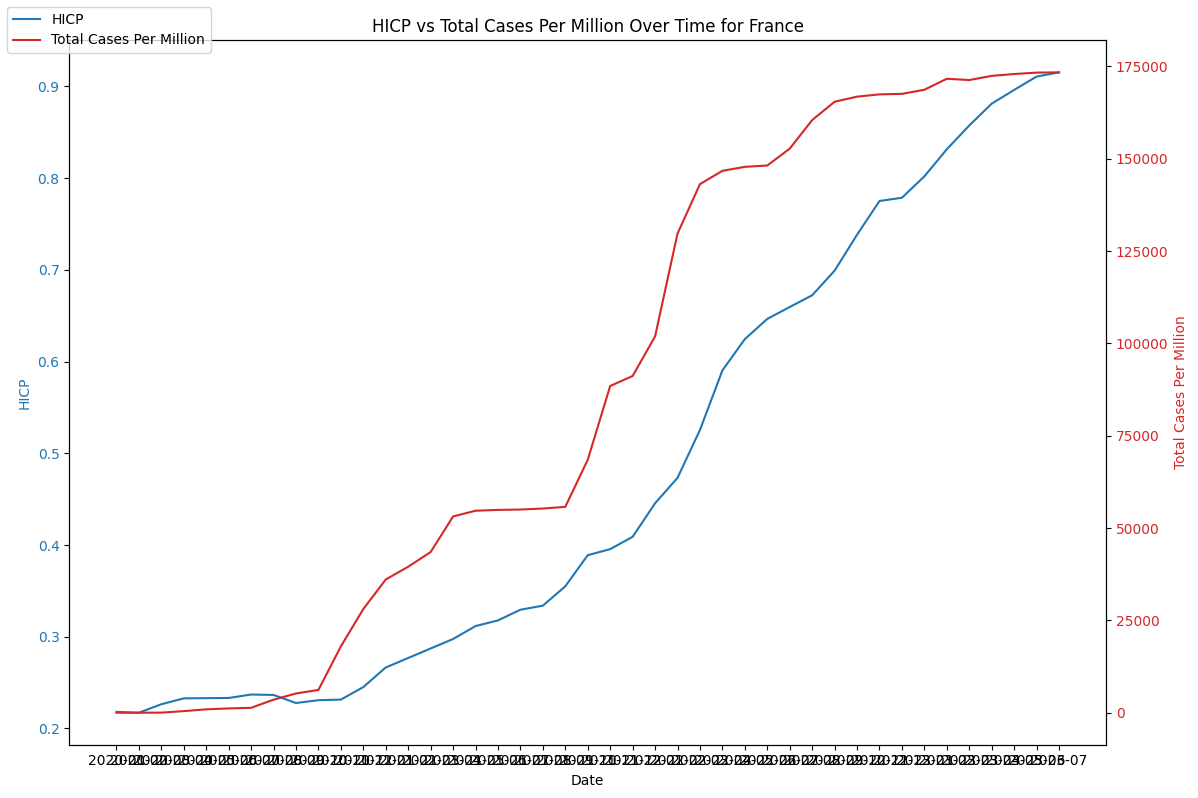

In [80]:
import matplotlib.pyplot as plt

# Filter data for France only
df_country = df_covid_HICP_europe[df_covid_HICP_europe['location'] == 'Romania']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot HICP on the primary y-axis
ax1.plot(df_country['date'], df_country['HICP'], color='tab:blue', label='HICP')
ax1.set_xlabel('Date')
ax1.set_ylabel('HICP', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for new_cases_smoothed_per_million
ax2 = ax1.twinx()
ax2.plot(df_country['date'], df_country['total_cases_per_million'], color='tab:red', label='Total Cases Per Million')
ax2.set_ylabel('Total Cases Per Million', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title('HICP vs Total Cases Per Million Over Time for France')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()


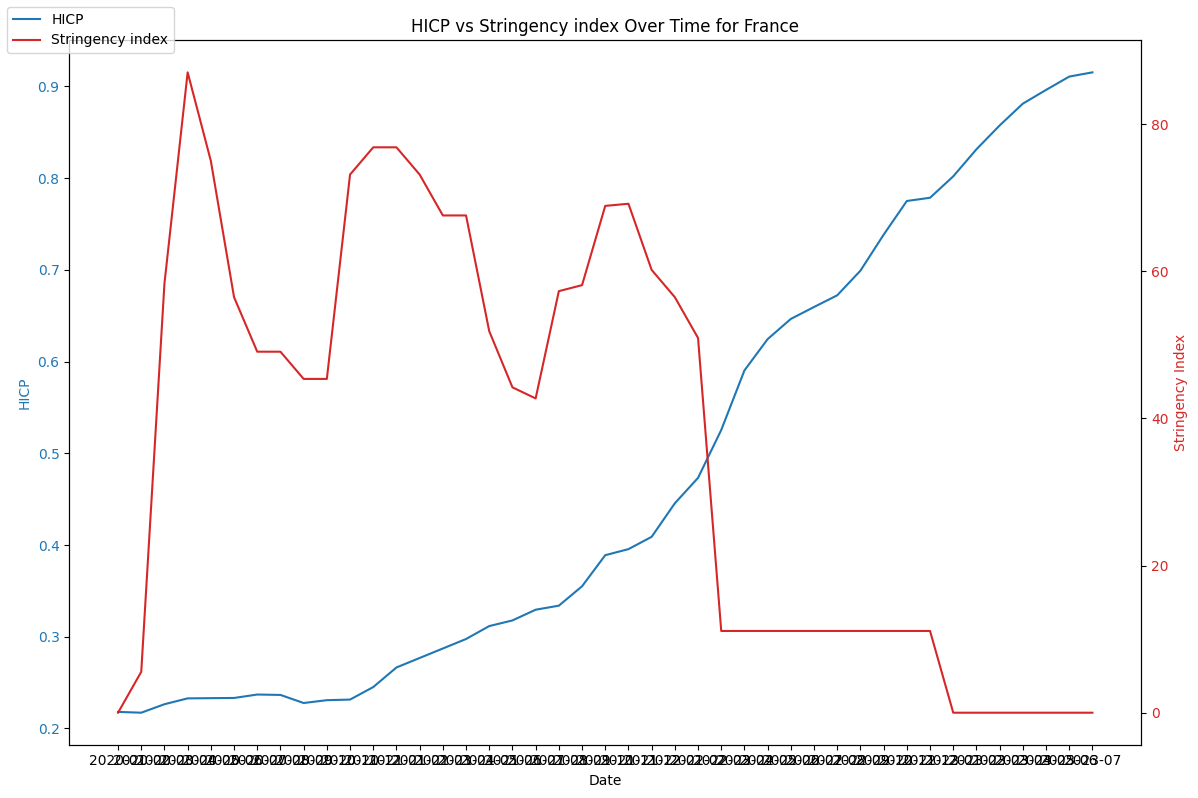

In [81]:
import matplotlib.pyplot as plt

# Filter data for France only
df_country = df_covid_HICP_europe[df_covid_HICP_europe['location'] == 'Romania']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot HICP on the primary y-axis
ax1.plot(df_country['date'], df_country['HICP'], color='tab:blue', label='HICP')
ax1.set_xlabel('Date')
ax1.set_ylabel('HICP', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for new_cases_smoothed_per_million
ax2 = ax1.twinx()
ax2.plot(df_country['date'], df_country['stringency_index'], color='tab:red', label='Stringency index')
ax2.set_ylabel('Stringency Index', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title('HICP vs Stringency index Over Time for France')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()


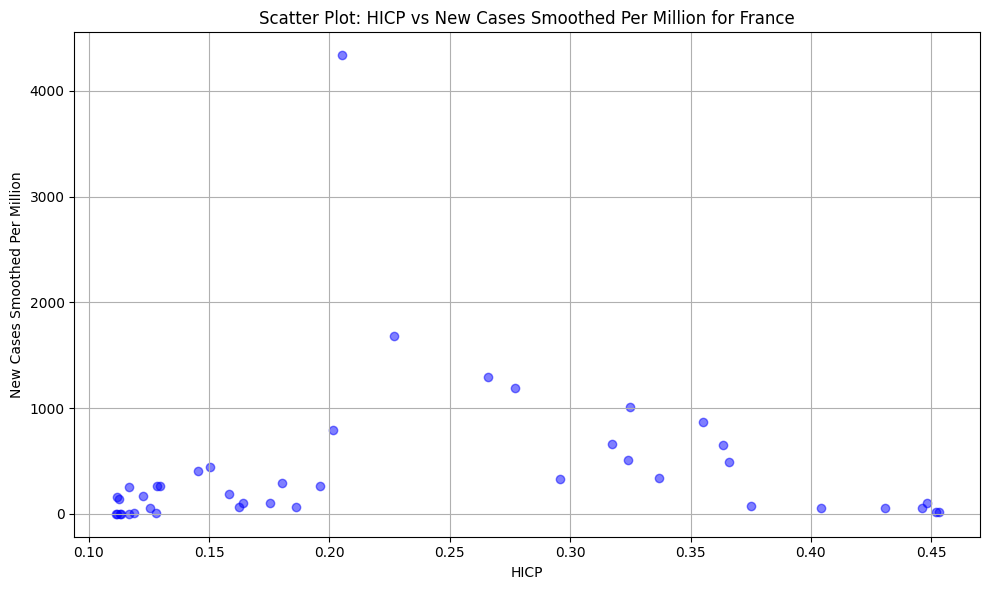

In [82]:
import matplotlib.pyplot as plt

# Filter data for France only
df_france = df_covid_HICP_europe[df_covid_HICP_europe['location'] == 'France']

# Plotting
plt.figure(figsize=(10, 6))

# Scatter plot
plt.scatter(df_france['HICP'], df_france['new_cases_smoothed_per_million'], color='blue', alpha=0.5)

# Title and labels
plt.title('Scatter Plot: HICP vs New Cases Smoothed Per Million for France')
plt.xlabel('HICP')
plt.ylabel('New Cases Smoothed Per Million')

plt.grid(True)
plt.tight_layout()
plt.show()


In [83]:
df_covid_HICP_europe.columns

Index(['date', 'HICP', 'location', 'total_deaths', 'stringency_index',
       'total_cases_per_million', 'new_cases_smoothed_per_million',
       'weekly_hosp_admissions_per_million', 'continent', 'Year', 'Month'],
      dtype='object')

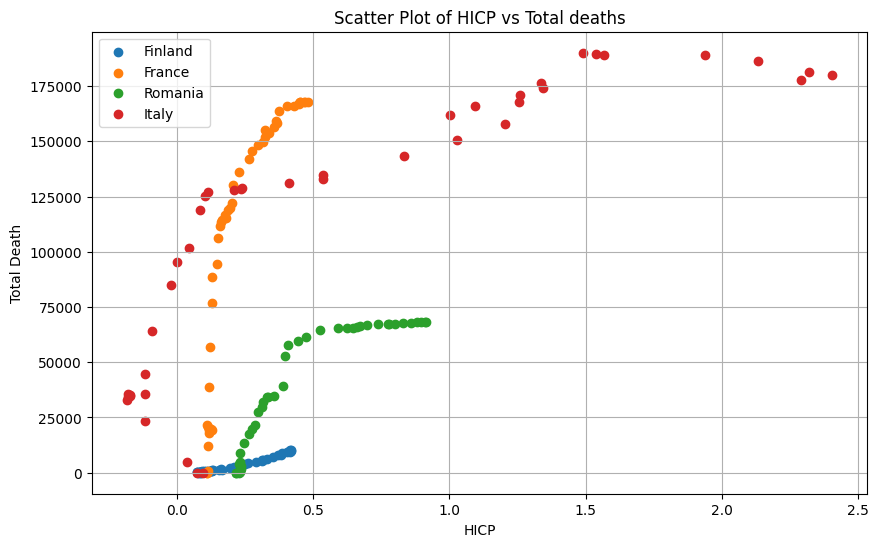

In [84]:
import matplotlib.pyplot as plt

# Filter data for the selected countries
selected_countries = ['Finland', 'France', 'Romania', 'Italy']
df_selected_countries = df_covid_HICP_europe[df_covid_HICP_europe['location'].isin(selected_countries)]

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each country and plot a scatter plot
for country in selected_countries:
    df_country = df_selected_countries[df_selected_countries['location'] == country]
    plt.scatter(df_country['HICP'], df_country['total_deaths'], label=country)

# Plot customization
plt.xlabel('HICP')
plt.ylabel('Total Death')
plt.title('Scatter Plot of HICP vs Total deaths')
plt.legend()
plt.grid(True)
plt.show()


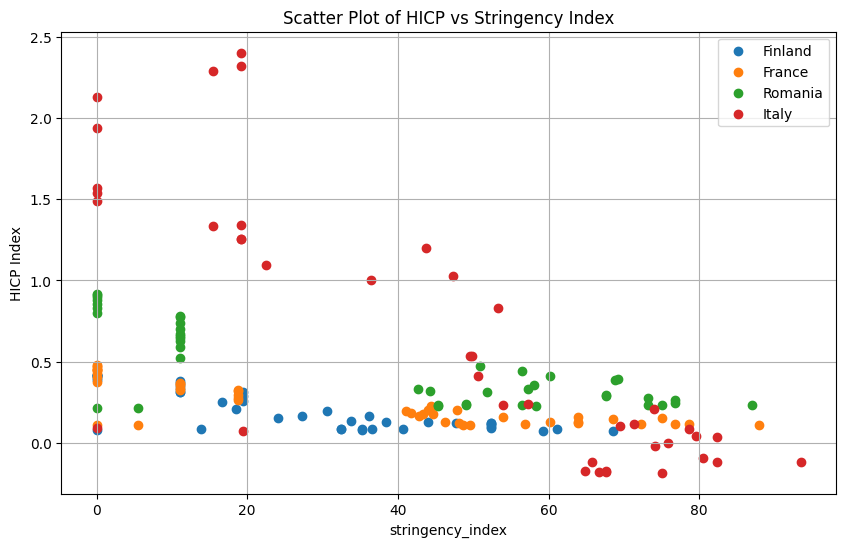

In [85]:
import matplotlib.pyplot as plt

# Filter data for the selected countries
selected_countries = ['Finland', 'France', 'Romania', 'Italy']
df_selected_countries = df_covid_HICP_europe[df_covid_HICP_europe['location'].isin(selected_countries)]

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each country and plot a scatter plot
for country in selected_countries:
    df_country = df_selected_countries[df_selected_countries['location'] == country]
    plt.scatter(df_country['stringency_index'], df_country['HICP'], label=country)

# Plot customization
plt.xlabel('stringency_index')
plt.ylabel('HICP Index')
plt.title('Scatter Plot of HICP vs Stringency Index')
plt.legend()
plt.grid(True)
plt.show()


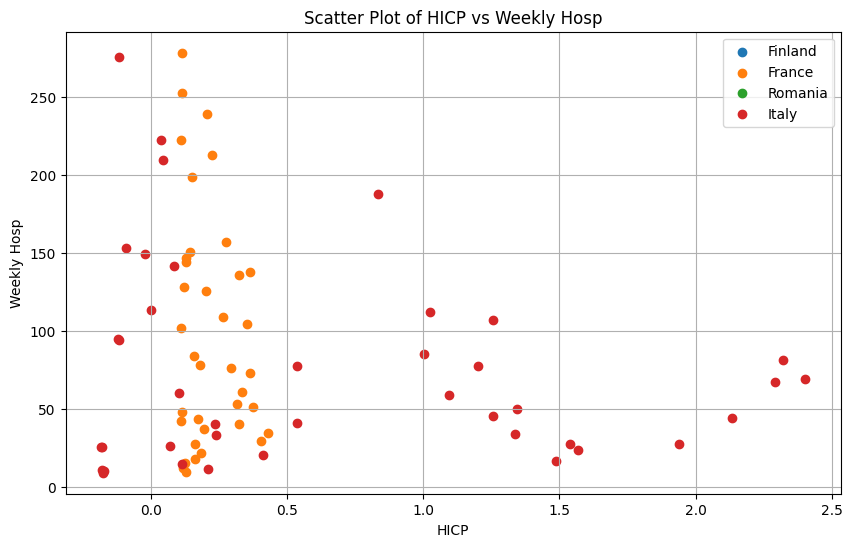

In [86]:
import matplotlib.pyplot as plt

# Filter data for the selected countries
selected_countries = ['Finland', 'France', 'Romania', 'Italy']
df_selected_countries = df_covid_HICP_europe[df_covid_HICP_europe['location'].isin(selected_countries)]

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each country and plot a scatter plot
for country in selected_countries:
    df_country = df_selected_countries[df_selected_countries['location'] == country]
    plt.scatter(df_country['HICP'], df_country['weekly_hosp_admissions_per_million'], label=country)

# Plot customization
plt.xlabel('HICP')
plt.ylabel('Weekly Hosp')
plt.title('Scatter Plot of HICP vs Weekly Hosp')
plt.legend()
plt.grid(True)
plt.show()


In [87]:
# Select only numeric columns
numeric_columns = df_covid_HICP_europe.select_dtypes(include='number')

# Calculate correlation coefficients
correlation_matrix = numeric_columns.corr()

# Display correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)


Correlation Coefficients:
                                        HICP  total_deaths  stringency_index  \
HICP                                1.000000      0.509627         -0.512980   
total_deaths                        0.509627      1.000000         -0.294830   
stringency_index                   -0.512980     -0.294830          1.000000   
total_cases_per_million             0.536457      0.650455         -0.657001   
new_cases_smoothed_per_million      0.170255      0.297903          0.027945   
weekly_hosp_admissions_per_million -0.085255      0.028087          0.258347   
Year                                0.596656      0.564663         -0.710363   
Month                               0.029626      0.029949          0.055406   

                                    total_cases_per_million  \
HICP                                               0.536457   
total_deaths                                       0.650455   
stringency_index                                  -0.657001   
t

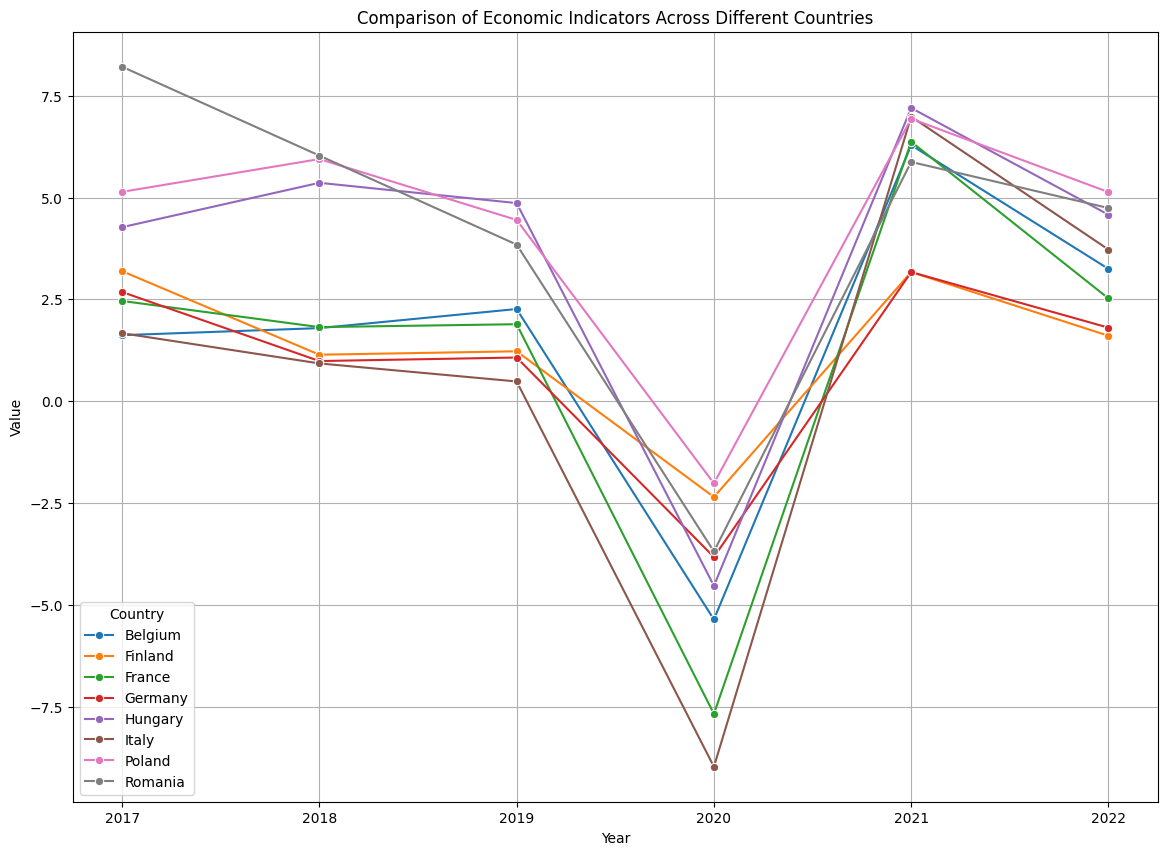

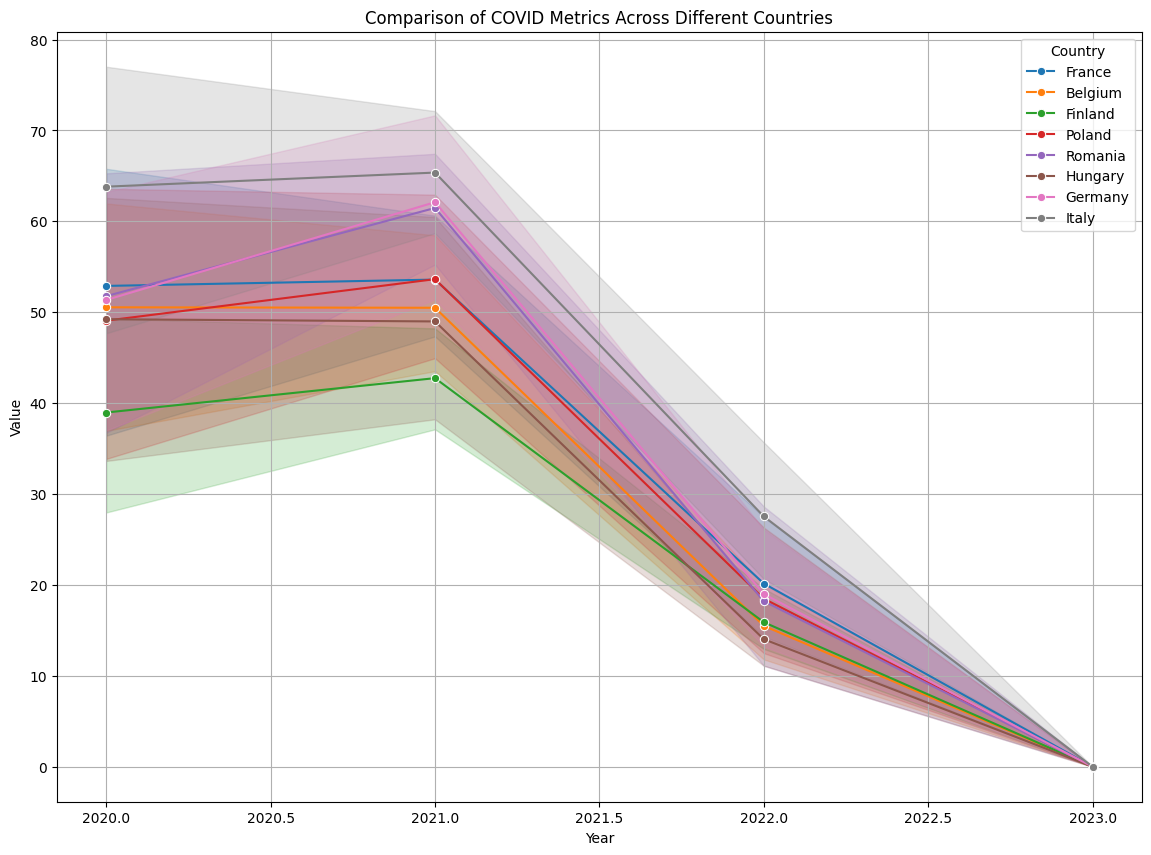

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define the economic indicators and COVID metrics of interest
economic_indicators = ['GDP']
covid_metrics = [ 'stringency_index']

# Plot economic indicators for each country
plt.figure(figsize=(14, 10))
for indicator in economic_indicators:
    sns.lineplot(data=df_economics_europe, x='Year', y=indicator, hue='location', marker='o')
plt.title('Comparison of Economic Indicators Across Different Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()

# Plot COVID metrics for each country
plt.figure(figsize=(14, 10))
for metric in covid_metrics:
    sns.lineplot(data=df_covid_HICP_europe, x='Year', y=metric, hue='location', marker='o')
plt.title('Comparison of COVID Metrics Across Different Countries')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend(title='Country')
plt.grid(True)
plt.show()


<Figure size 1200x1000 with 0 Axes>

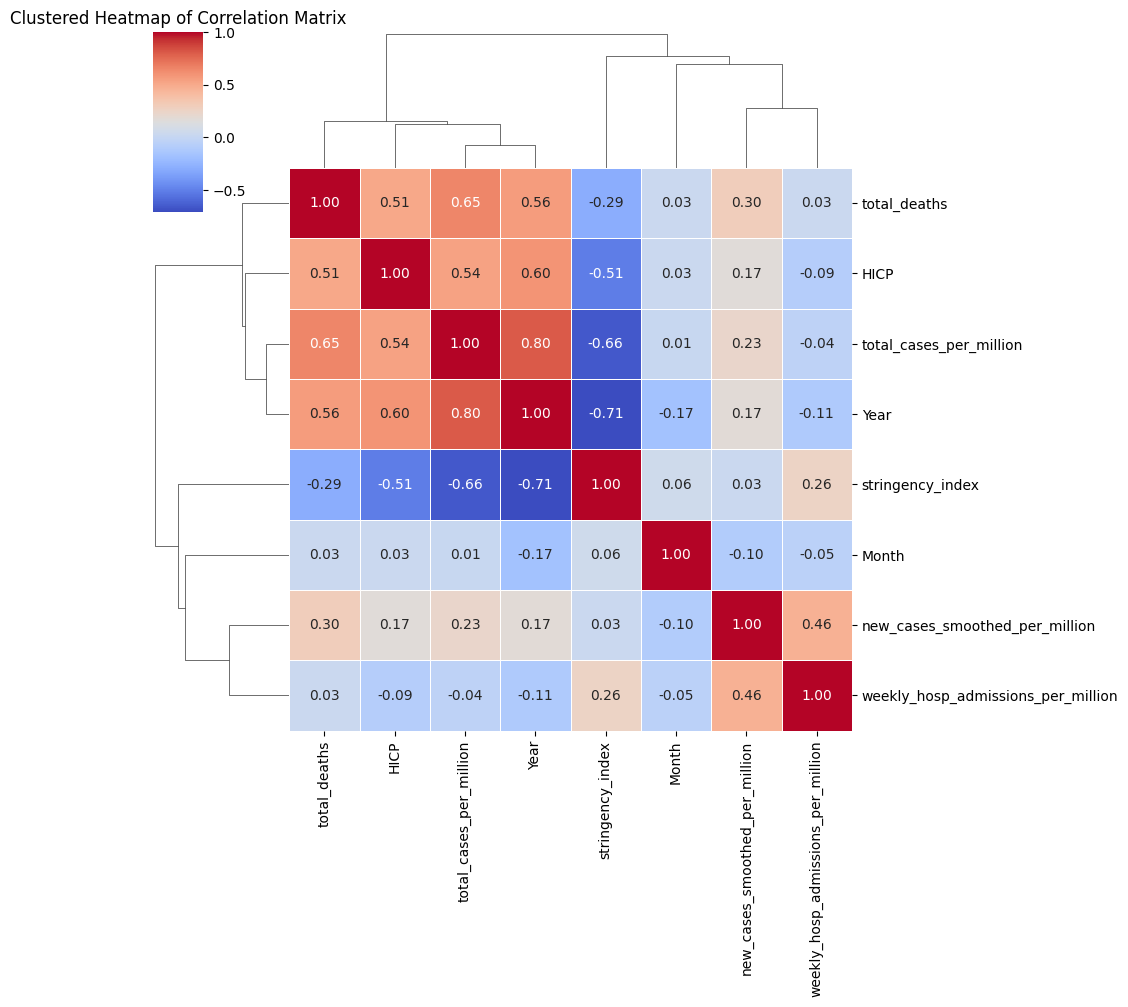

In [89]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = df_covid_HICP_europe.select_dtypes(include='number')
# Compute the correlation matrix
corr = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.clustermap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", annot_kws={"size": 10})

# Add a title
plt.title('Clustered Heatmap of Correlation Matrix')

# Show the plot
plt.show()


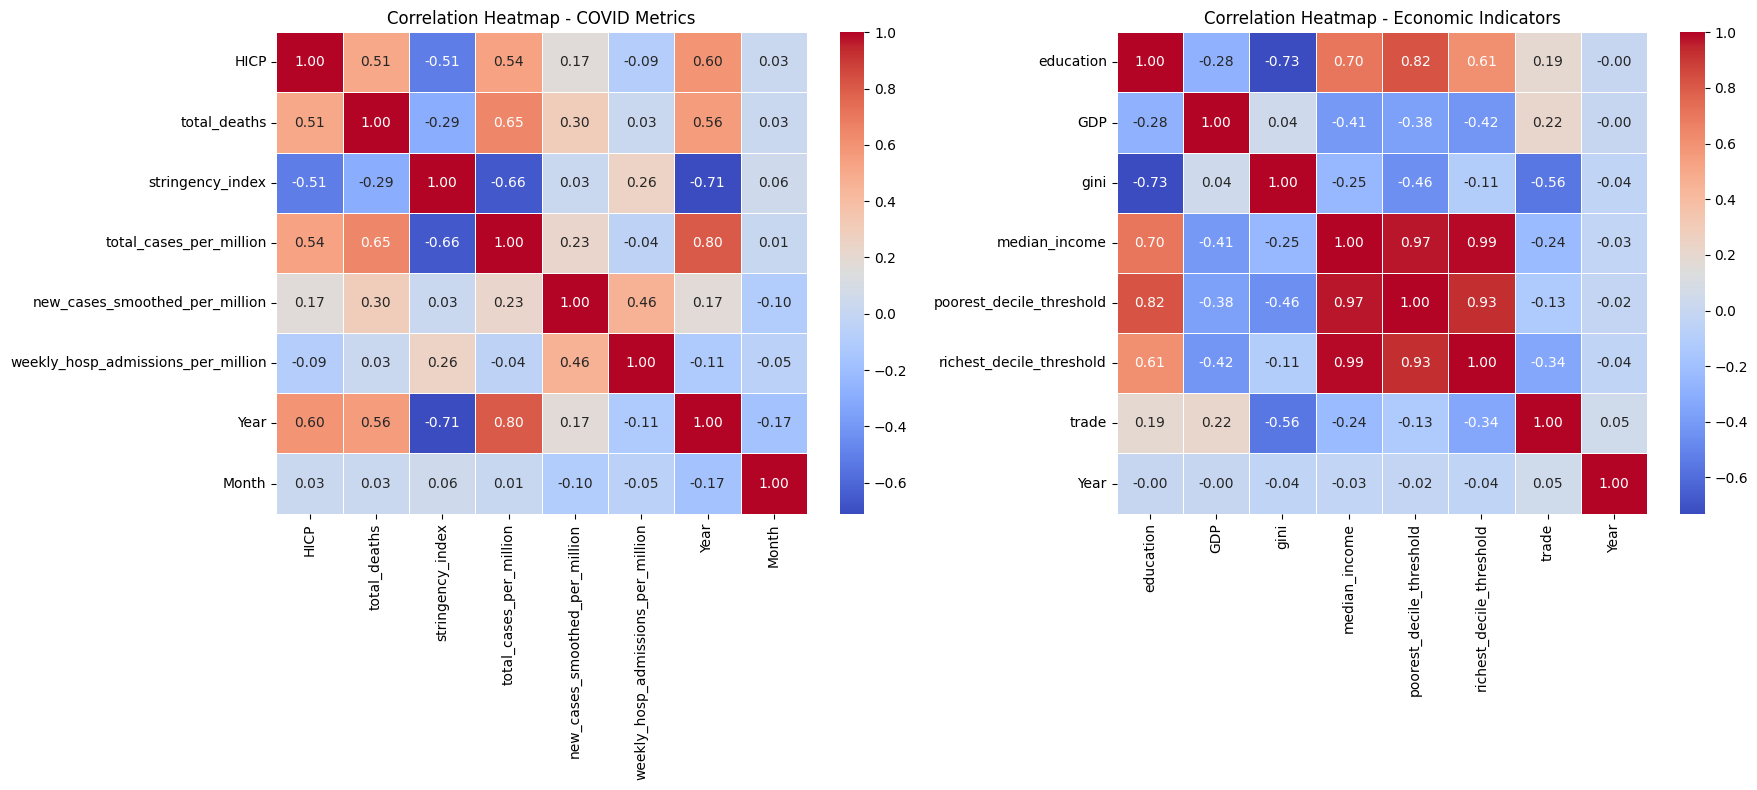

In [90]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_columns_cov = df_covid_HICP_europe.select_dtypes(include='number')
numeric_columns_eco = df_economics_europe.select_dtypes(include='number')
# Calculate correlation matrix for df_covid_HICP_europe
corr_covid = numeric_columns_cov.corr()

# Calculate correlation matrix for df_economics_europe
corr_economics = numeric_columns_eco.corr()

# Set up the matplotlib figure
fig, axes = plt.subplots(1, 2, figsize=(18, 8))

# Draw the heatmap for df_covid_HICP_europe
sns.heatmap(corr_covid, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=axes[0])
axes[0].set_title('Correlation Heatmap - COVID Metrics')

# Draw the heatmap for df_economics_europe
sns.heatmap(corr_economics, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", ax=axes[1])
axes[1].set_title('Correlation Heatmap - Economic Indicators')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()


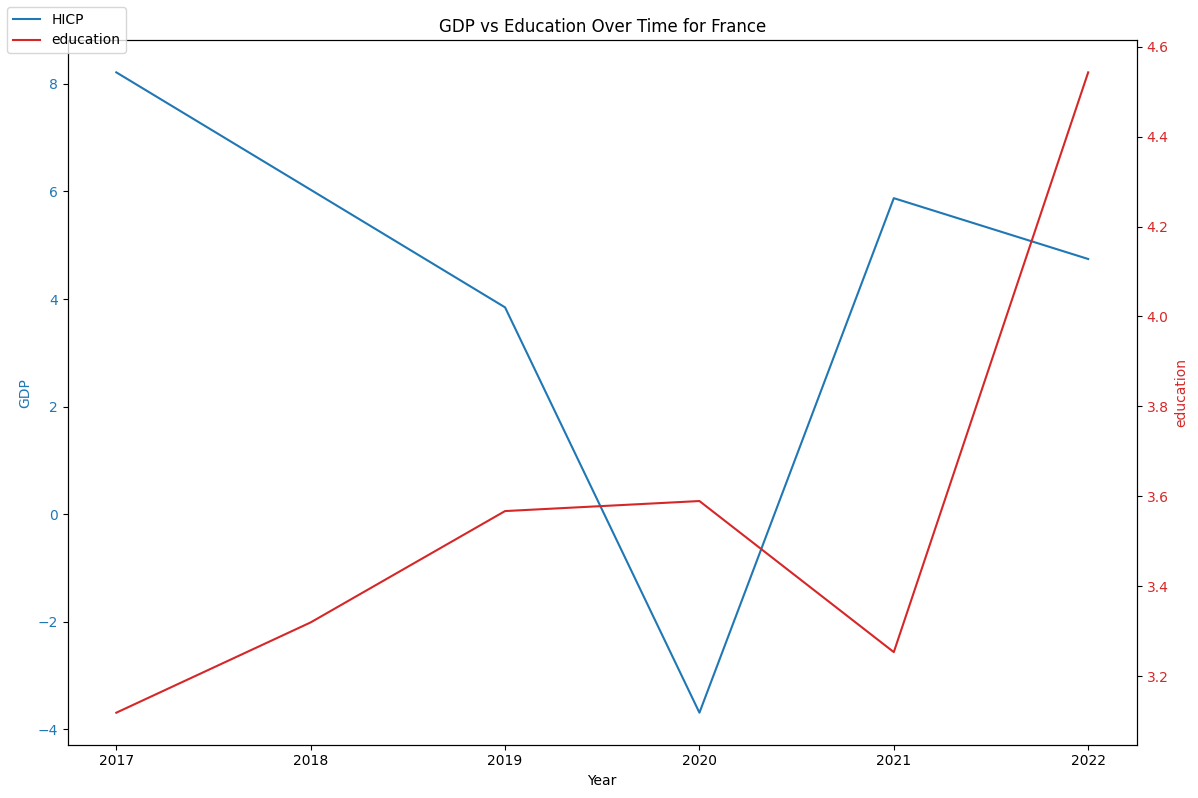

In [124]:
import matplotlib.pyplot as plt

# Filter data for France only
df_country = df_economics_europe[df_economics_europe['location'] == 'Romania']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot HICP on the primary y-axis
ax1.plot(df_country['Year'], df_country['GDP'], color='tab:blue', label='HICP')
ax1.set_xlabel('Year')
ax1.set_ylabel('GDP', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for new_cases_smoothed_per_million
ax2 = ax1.twinx()
ax2.plot(df_country['Year'], df_country['education'], color='tab:red', label='education')
ax2.set_ylabel('education', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title('GDP vs Education Over Time for France')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()


In [121]:
df_economics_europe.columns

Index(['location', 'education', 'GDP', 'gini', 'median_income',
       'poorest_decile_threshold', 'richest_decile_threshold', 'trade',
       'continent', 'Year'],
      dtype='object')

# Visualise merged  table

<Figure size 1200x1000 with 0 Axes>

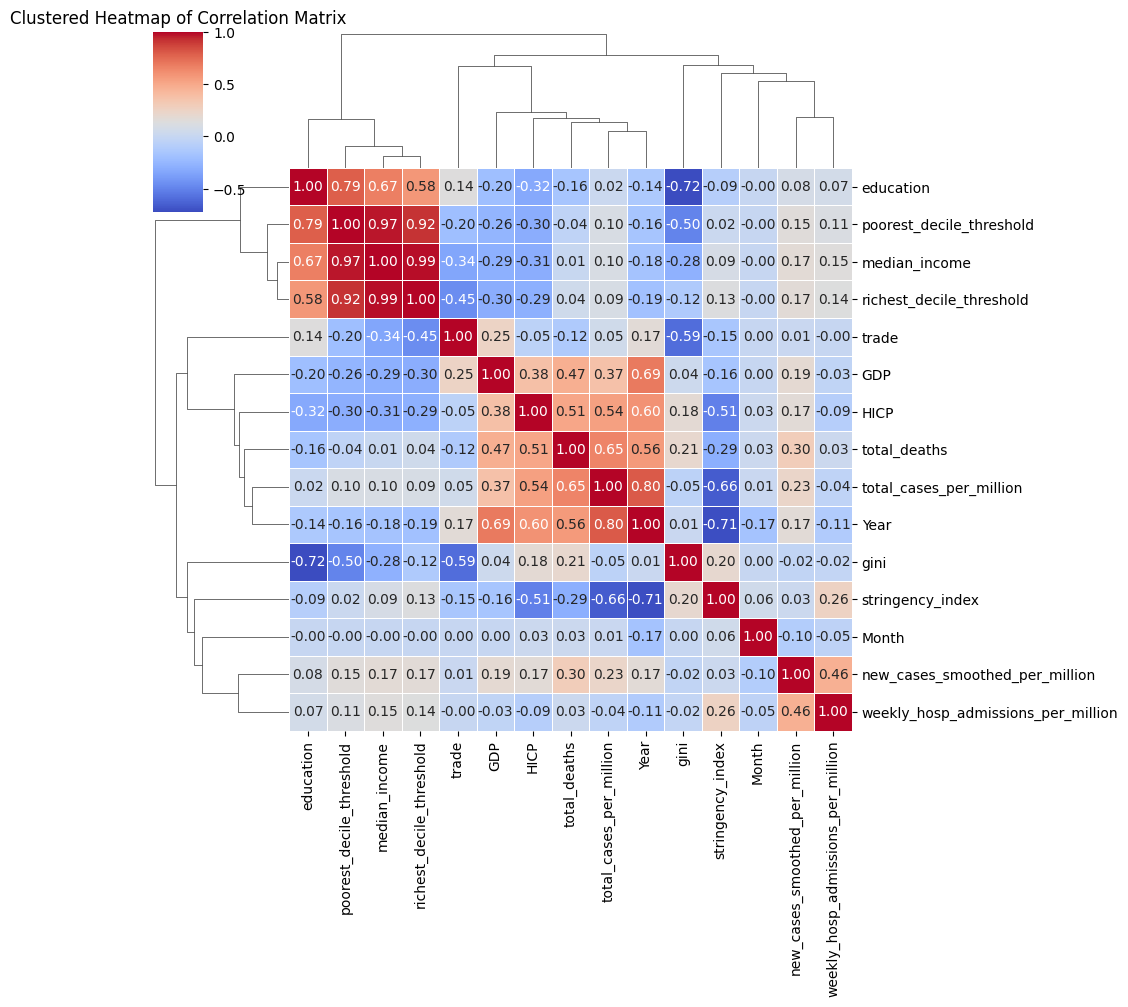

In [98]:
import seaborn as sns
import matplotlib.pyplot as plt

numeric_columns = merged_df.select_dtypes(include='number')
# Compute the correlation matrix
corr = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.clustermap(corr, annot=True, cmap='coolwarm', linewidths=.5, fmt=".2f", annot_kws={"size": 10})

# Add a title
plt.title('Clustered Heatmap of Correlation Matrix')

# Show the plot
plt.show()


In [96]:
merged_df.head()

,date,location,total_deaths,stringency_index,total_cases_per_million,new_cases_smoothed_per_million,weekly_hosp_admissions_per_million,continent,Year,Month,education,GDP,gini,median_income,poorest_decile_threshold,richest_decile_threshold,trade
0,2020-01-01,France,0.0,0.00,0.248,0.007,NaN,Europe,2020,1,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
1,2020-02-01,France,0.0,5.56,0.248,0.007,NaN,Europe,2020,2,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
2,2020-03-01,France,713.0,56.94,0.248,0.000,278.4130,Europe,2020,3,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
3,2020-04-01,France,12062.0,87.96,0.248,0.000,222.1845,Europe,2020,4,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823
4,2020-05-01,France,17992.0,76.85,77.878,1.497,47.6900,Europe,2020,5,5.67784,-7.682,0.306615,50.13696,24.153225,92.65076,56.863823


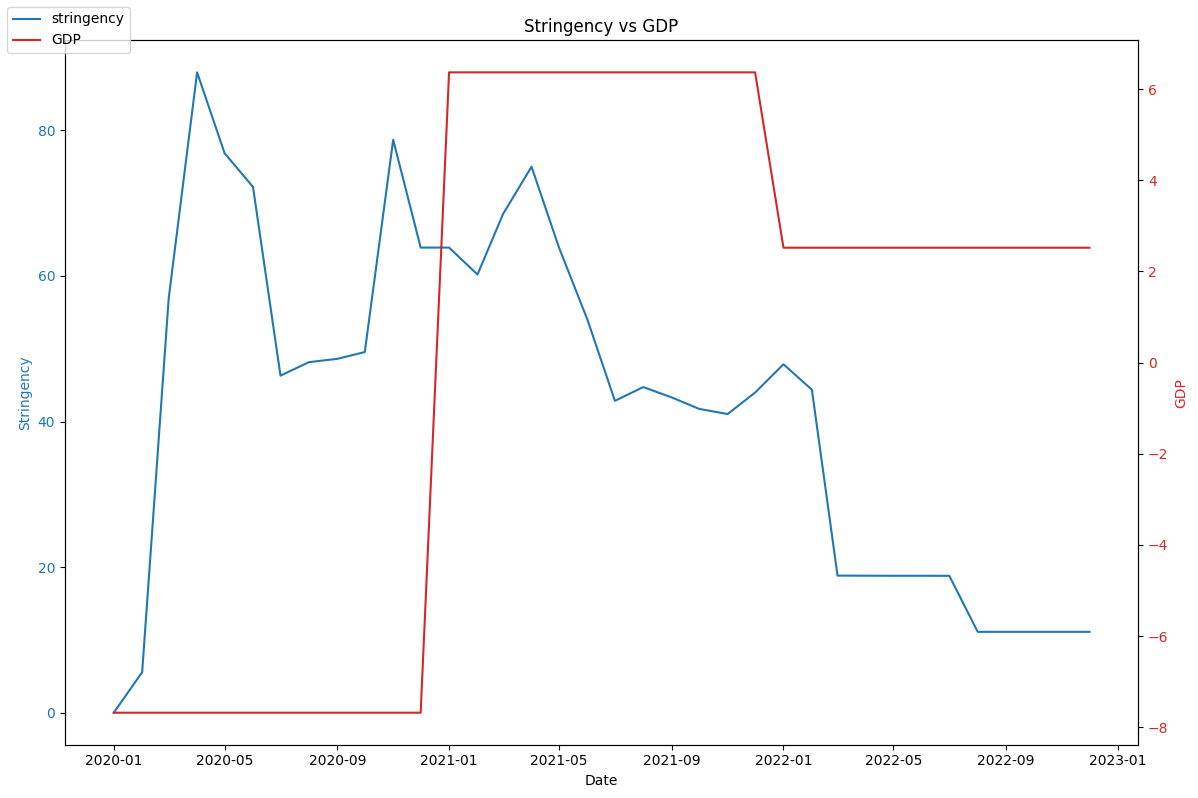

In [120]:
import matplotlib.pyplot as plt

# Filter data for France only
df_country = merged_df[merged_df['location'] == 'France']

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot HICP on the primary y-axis
ax1.plot(df_country['date'], df_country['stringency_index'], color='tab:blue', label='stringency')
ax1.set_xlabel('Date')
ax1.set_ylabel('Stringency', color='tab:blue')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Create a secondary y-axis for new_cases_smoothed_per_million
ax2 = ax1.twinx()
ax2.plot(df_country['date'], df_country['GDP'], color='tab:red', label='GDP')
ax2.set_ylabel('GDP', color='tab:red')
ax2.tick_params(axis='y', labelcolor='tab:red')

# Title and legend
plt.title('Stringency vs GDP')
fig.legend(loc='upper left')

plt.tight_layout()
plt.show()


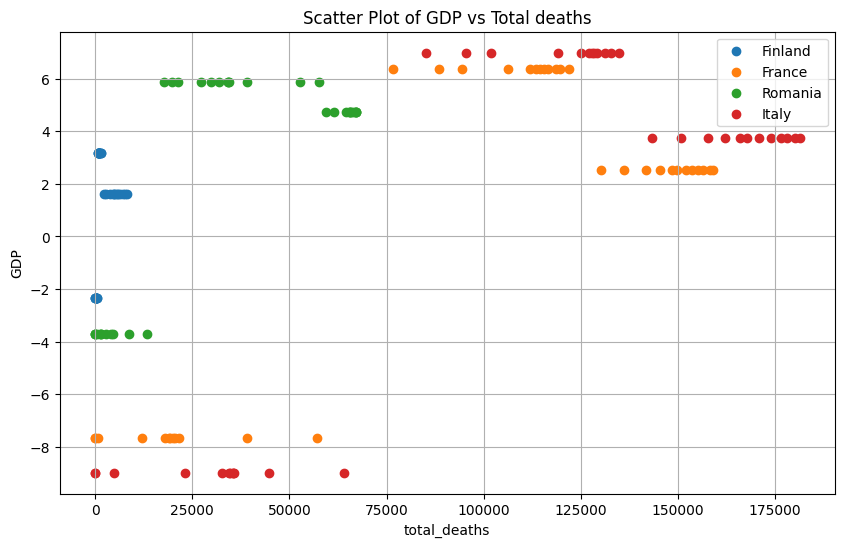

In [109]:
import matplotlib.pyplot as plt

# Filter data for the selected countries
selected_countries = ['Finland', 'France', 'Romania', 'Italy']
df_selected_countries = merged_df[merged_df['location'].isin(selected_countries)]

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each country and plot a scatter plot
for country in selected_countries:
    df_country = df_selected_countries[df_selected_countries['location'] == country]
    plt.scatter(df_country['total_deaths'], df_country['GDP'], label=country)

# Plot customization
plt.xlabel('total_deaths')
plt.ylabel('GDP')
plt.title('Scatter Plot of GDP vs Total deaths')
plt.legend()
plt.grid(True)
plt.show()


In [108]:
merged_df.columns

Index(['date', 'location', 'total_deaths', 'stringency_index',
       'total_cases_per_million', 'new_cases_smoothed_per_million',
       'weekly_hosp_admissions_per_million', 'HICP', 'continent', 'Year',
       'Month', 'education', 'GDP', 'gini', 'median_income',
       'poorest_decile_threshold', 'richest_decile_threshold', 'trade'],
      dtype='object')

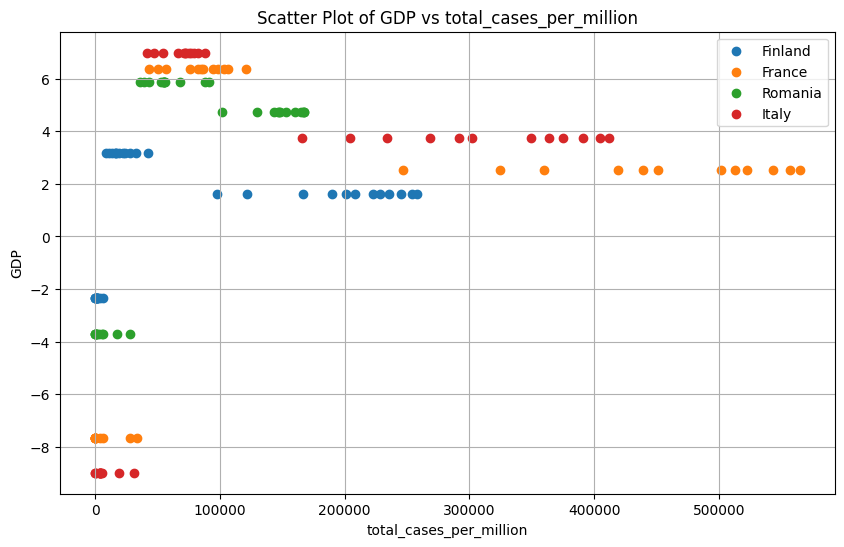

In [115]:
import matplotlib.pyplot as plt

# Filter data for the selected countries
selected_countries = ['Finland', 'France', 'Romania', 'Italy']
df_selected_countries = merged_df[merged_df['location'].isin(selected_countries)]

# Plotting
plt.figure(figsize=(10, 6))

# Iterate over each country and plot a scatter plot
for country in selected_countries:
    df_country = df_selected_countries[df_selected_countries['location'] == country]
    plt.scatter(df_country['total_cases_per_million'], df_country['GDP'], label=country)

# Plot customization
plt.xlabel('total_cases_per_million')
plt.ylabel('GDP')
plt.title('Scatter Plot of GDP vs total_cases_per_million')
plt.legend()
plt.grid(True)
plt.show()


In [107]:
# Select only numeric columns
numeric_columns = merged_df.select_dtypes(include='number')

# Calculate correlation coefficients
correlation_matrix = numeric_columns.corr()

# Display correlation coefficients
print("Correlation Coefficients:")
print(correlation_matrix)


Correlation Coefficients:
                                    total_deaths  stringency_index  \
total_deaths                            1.000000         -0.294830   
stringency_index                       -0.294830          1.000000   
total_cases_per_million                 0.650455         -0.657001   
new_cases_smoothed_per_million          0.297903          0.027945   
weekly_hosp_admissions_per_million      0.028087          0.258347   
HICP                                    0.509627         -0.512980   
Year                                    0.564663         -0.710363   
Month                                   0.029949          0.055406   
education                              -0.162487         -0.089264   
GDP                                     0.471092         -0.158868   
gini                                    0.210303          0.203441   
median_income                           0.006081          0.086602   
poorest_decile_threshold               -0.038327          0.0215

In [114]:
# Drop rows with missing or infinite values
merged_df.dropna(subset=['GDP', 'education', 'new_cases_smoothed_per_million'], inplace=True)
merged_df = merged_df.replace([np.inf, -np.inf], np.nan).dropna(subset=['GDP', 'education', 'new_cases_smoothed_per_million'])

# Define the independent variables (economic indicators) and the dependent variable (COVID metrics)
X = merged_df[['GDP', 'education']]  # Independent variables
y = merged_df['new_cases_smoothed_per_million']  # Dependent variable

# Add a constant term to the independent variables
X = sm.add_constant(X)

# Fit the Ordinary Least Squares (OLS) regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())


                                  OLS Regression Results                                  
Dep. Variable:     new_cases_smoothed_per_million   R-squared:                       0.050
Model:                                        OLS   Adj. R-squared:                  0.044
Method:                             Least Squares   F-statistic:                     7.529
Date:                            Tue, 19 Mar 2024   Prob (F-statistic):           0.000651
Time:                                    15:07:40   Log-Likelihood:                -2166.3
No. Observations:                             288   AIC:                             4339.
Df Residuals:                                 285   BIC:                             4350.
Df Model:                                       2                                         
Covariance Type:                        nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------